
#Image Classification using VGG16 model from scrtach



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:33<00:00, 23.0MB/s]
100% 1.98G/1.98G [01:34<00:00, 22.7MB/s]


In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

In [ ]:
#Dataset directry path

data_train_path = '/content/train'
data_test_path = '/content/test'
data_val_path = '/content/validation'

In [ ]:
img_width = 224
img_height = 224

Prepare Input Data Pipeline

In [ ]:
data_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=True,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


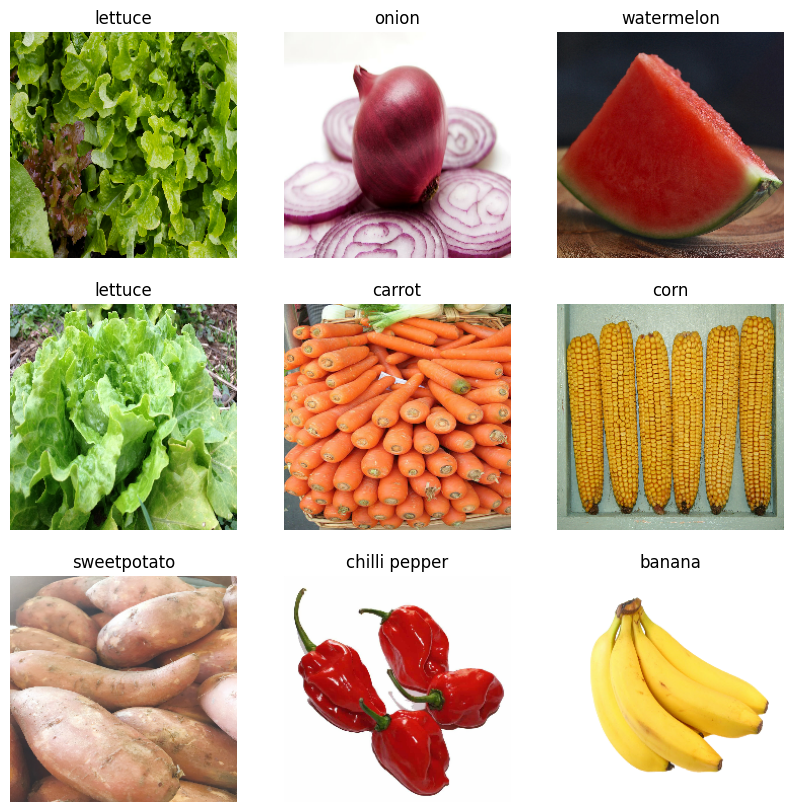

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

##Build VGG16 Model

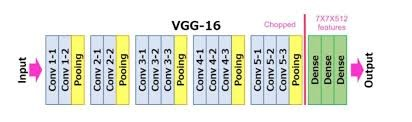

In [ ]:
VGG16_model = keras.Sequential()

VGG16_model.add(tf.keras.layers.Rescaling(1./255, input_shape=(224,224,3)))

#Block_1
VGG16_model.add(Conv2D(input_shape=(224,224,3),filters=64, kernel_size=(3,3),padding='same', activation='relu'))
VGG16_model.add(Conv2D(filters=64,kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#Block_2
VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#Block_3
VGG16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#Block_4
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#Block_5
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


VGG16_model.add(Flatten())
VGG16_model.add(Dense(256, activation='relu'))
VGG16_model.add(Dense(128, activation='relu'))
VGG16_model.add(Dense(len(data_cat), activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
VGG16_model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                        

In [ ]:
epochs_size = 10
history = VGG16_model.fit(data_train, validation_data=data_val, epochs=epochs_size, verbose=1)

Epoch 1/10
98/98 [==============================] - 132s 1s/step - loss: 3.6113 - accuracy: 0.0283 - val_loss: 3.5838 - val_accuracy: 0.0285
Epoch 2/10
98/98 [==============================] - 82s 792ms/step - loss: 3.5820 - accuracy: 0.0292 - val_loss: 3.5846 - val_accuracy: 0.0285
Epoch 3/10
98/98 [==============================] - 81s 783ms/step - loss: 3.5811 - accuracy: 0.0286 - val_loss: 3.5860 - val_accuracy: 0.0285
Epoch 4/10
98/98 [==============================] - 80s 762ms/step - loss: 3.5803 - accuracy: 0.0266 - val_loss: 3.5868 - val_accuracy: 0.0285
Epoch 5/10
98/98 [==============================] - 81s 766ms/step - loss: 3.5798 - accuracy: 0.0286 - val_loss: 3.5879 - val_accuracy: 0.0285
Epoch 6/10
98/98 [==============================] - 80s 762ms/step - loss: 3.5798 - accuracy: 0.0238 - val_loss: 3.5876 - val_accuracy: 0.0256
Epoch 7/10
98/98 [==============================] - 79s 767ms/step - loss: 3.5795 - accuracy: 0.0305 - val_loss: 3.5885 - val_accuracy: 0.0285
E

Text(0.5, 1.0, 'Loss')

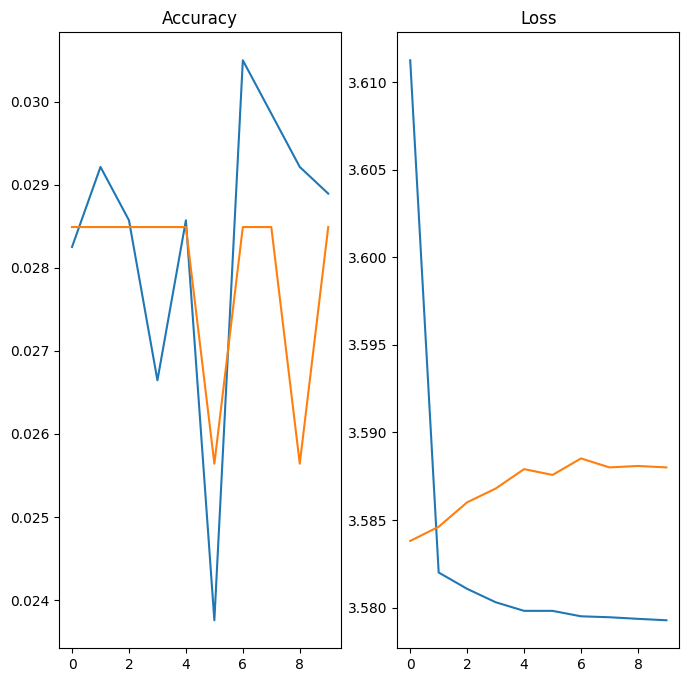

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

Test an random example from internet

In [ ]:
#pre-processing image

image = '/content/Corn.jpg'           #put the directory of the image
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = VGG16_model.predict(img_bat)

1/1 [==============================] - 2s 2s/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is peas with accuracy of 2.79


But VGG16 is a complex model. Therefore, to get higher accuracy it is needed to train too much and use al lot of images.

Therefore, as a solution, it is used pre-trained VGG16 model on imagenet dataset

In [ ]:
from keras.applications.vgg16 import VGG16

vgg16 = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
#layers in pre-trained model set to not trainable

for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
 #remove last layer
model = tf.keras.Sequential()

model.add(vgg16)


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(len(data_cat), activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.build((None, 224, 224, 3))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               3211392   
                                                                 
 dense_4 (Dense)             (None, 36)                4644      
                                                                 
Total params: 17930724 (68.40 MB)
Trainable params: 3216036 (12.27 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, verbose=2)

Epoch 1/10
98/98 - 73s - loss: 7.0193 - accuracy: 0.1226 - val_loss: 2.9369 - val_accuracy: 0.2137 - 73s/epoch - 740ms/step
Epoch 2/10
98/98 - 69s - loss: 3.0230 - accuracy: 0.2334 - val_loss: 2.5479 - val_accuracy: 0.3390 - 69s/epoch - 706ms/step
Epoch 3/10
98/98 - 88s - loss: 2.6809 - accuracy: 0.2989 - val_loss: 2.2441 - val_accuracy: 0.4046 - 88s/epoch - 896ms/step
Epoch 4/10
98/98 - 72s - loss: 2.3253 - accuracy: 0.3875 - val_loss: 2.0070 - val_accuracy: 0.4530 - 72s/epoch - 734ms/step
Epoch 5/10
98/98 - 69s - loss: 2.2112 - accuracy: 0.4083 - val_loss: 2.0460 - val_accuracy: 0.4473 - 69s/epoch - 705ms/step
Epoch 6/10
98/98 - 69s - loss: 2.0959 - accuracy: 0.4427 - val_loss: 1.6173 - val_accuracy: 0.5356 - 69s/epoch - 702ms/step
Epoch 7/10
98/98 - 69s - loss: 1.9240 - accuracy: 0.4610 - val_loss: 1.5853 - val_accuracy: 0.5470 - 69s/epoch - 703ms/step
Epoch 8/10
98/98 - 69s - loss: 1.7756 - accuracy: 0.5005 - val_loss: 1.6630 - val_accuracy: 0.5584 - 69s/epoch - 705ms/step
Epoch 9/